<h1> Data Science sobre venda de carros</h1>
<br>
Esta apresentação foi montada com o intuito de tentar fazer previsões e definir
requisitos que os consumidores mais consideram em um carro, utilizando uma base de dados do kaggle <a href='https://www.kaggle.com/gagandeep16/car-sales'></a>
que inclui alguns fabricantes e seus modelos, foi feita por <b>Victor Machado</b> e <b>Celso Reis</b>

In [50]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [51]:
#leitura do arquivo
cars = pd.read_csv('Car_sales.csv')

In [52]:
#Exibindo as 10 primeiras linhas do Dataframe
cars.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [53]:
#Resumo de informações em todas as colunas
cars.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [54]:
#Tipo de dado em cada coluna
cars.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [55]:
#Quantidade de Linhas e colunas no Dataframe
cars.shape

(157, 16)

In [56]:
#Renomeando colunas
cars.columns = ['Fabricante', 'Modelo', 'Vendas em milhares',
                'Valor de revenda no ano', 'Tipo de Veiculo', 
                'Preço em milhares','Tamanho do Motor', 'Cavalos de Potência',
               'Distância entre Eixos', 'Largura', 'Comprimento', 
                'Peso do Freio', 'Capacidade de Combustível',
                'Eficiência do Combustível','Ultimo Lançamento',
                'Fator de Desempenho de Energia']

In [57]:
cars.head(10)

,Fabricante,Modelo,Vendas em milhares,Valor de revenda no ano,Tipo de Veiculo,Preço em milhares,Tamanho do Motor,Cavalos de Potência,Distância entre Eixos,Largura,Comprimento,Peso do Freio,Capacidade de Combustível,Eficiência do Combustível,Ultimo Lançamento,Fator de Desempenho de Energia
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [58]:
#Verificando Linhas onde não há o ano do ultimo lançamento. 
#Verificamos que não há nulos. 
cars[cars['Ultimo Lançamento'].isnull()].head()

,Fabricante,Modelo,Vendas em milhares,Valor de revenda no ano,Tipo de Veiculo,Preço em milhares,Tamanho do Motor,Cavalos de Potência,Distância entre Eixos,Largura,Comprimento,Peso do Freio,Capacidade de Combustível,Eficiência do Combustível,Ultimo Lançamento,Fator de Desempenho de Energia


In [59]:
cars['Fabricante'].value_counts()

Dodge         11
Ford          11
Chevrolet      9
Toyota         9
Mercedes-B     9
Nissan         7
Mitsubishi     7
Chrysler       7
Oldsmobile     6
Mercury        6
Volkswagen     6
Lexus          6
Volvo          6
Pontiac        6
Honda          5
Cadillac       5
Saturn         5
Plymouth       4
Buick          4
Acura          4
Porsche        3
Jeep           3
BMW            3
Lincoln        3
Audi           3
Hyundai        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Fabricante, dtype: int64

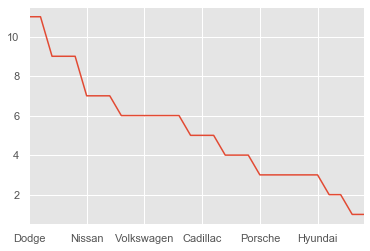

In [60]:
cars['Fabricante'].value_counts().plot()

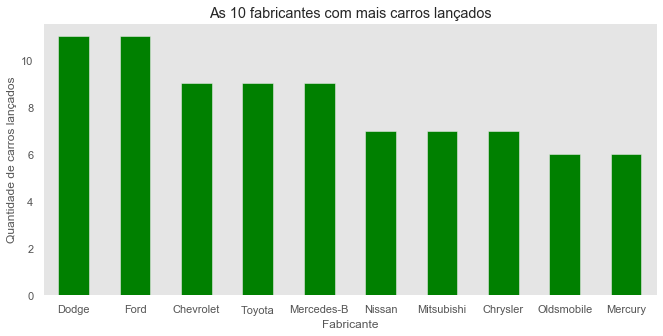

In [61]:
#Criando um gráfico de colunas
cars['Fabricante'].value_counts().head(10).plot(kind='bar', figsize=(11, 5), grid = False, rot=0, color='green')

#Definindo um titulo
plt.title('As 10 fabricantes com mais carros lançados')
plt.xlabel('Fabricante')#Nomeando o eixo X, onde fica o nome dos fabricantes
plt.ylabel('Quantidade de carros lançados')#Nomeando o eixo y, onde fica a quantidade de carros
plt.show()

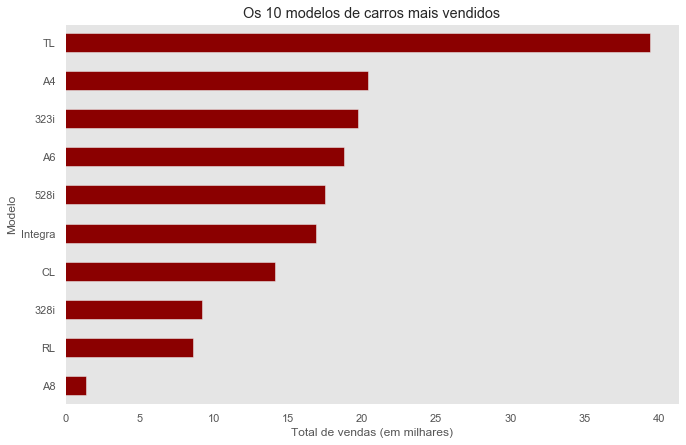

In [62]:
#Os 10 Modelos de carros mais vendidos
top_10_vendidos = cars[['Modelo', 'Vendas em milhares',]].head(10).set_index('Modelo').sort_values('Vendas em milhares', ascending=True)
top_10_vendidos.plot(kind='barh', figsize=(11,7), grid=False, color='darkred', legend=False)

plt.title('Os 10 modelos de carros mais vendidos')
plt.xlabel('Total de vendas (em milhares)')
plt.show()

In [63]:
#o topo dos fabricantes com eficiencia de combustivel equivalente.
crosstab_cv = pd.crosstab(cars['Fabricante'], cars['Eficiência do Combustível'])
crosstab_cv.head()

Eficiência do Combustível,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,45.0
Fabricante,,,,,,,,,,,,,,,,,,,,
Acura,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0
Audi,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
BMW,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
Buick,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0
Cadillac,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
crosstab_cv['Total'] = crosstab_cv.sum(axis=1)
crosstab_cv.head()

Eficiência do Combustível,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,...,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,45.0,Total
Fabricante,,,,,,,,,,,,,,,,,,,,,
Acura,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,4
Audi,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,3
BMW,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,3
Buick,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4
Cadillac,1,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,5


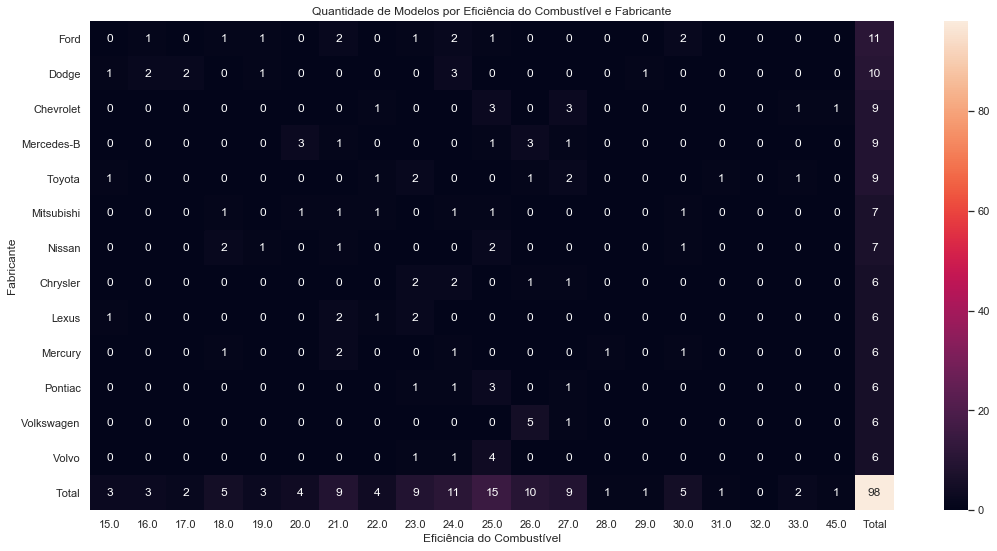

In [65]:
#Mapa de calor com Quantidade de carros por Eficiência do Combustível E Fabricante
top10_platforms = crosstab_cv[crosstab_cv['Total'] > 5].sort_values('Total', ascending = False)
top10_final = top10_platforms.append(pd.DataFrame(top10_platforms.sum(), columns=['Total']).T, ignore_index=False)

sns.set(font_scale=1)
plt.figure(figsize=(18,9))
sns.heatmap(top10_final, annot=True, vmax=top10_final.values.max(), vmin=top10_final.values.min(), fmt='d')
plt.xlabel('Eficiência do Combustível')
plt.ylabel('Fabricante')
plt.title('Quantidade de Modelos por Eficiência do Combustível e Fabricante')
plt.show()

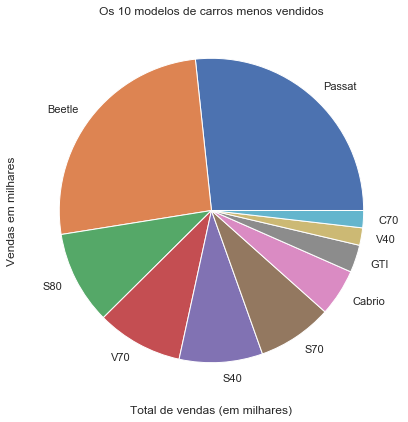

In [66]:
#Os 10 Modelos de carros menos vendidos
top_10_menosvendidos = cars[['Modelo', 'Vendas em milhares',]].tail(10).set_index('Modelo').sort_values('Vendas em milhares', ascending=False)
top_10_menosvendidos.plot(kind='pie', figsize=(11,7), grid=False, legend=False, subplots=True)

plt.title('Os 10 modelos de carros menos vendidos')
plt.xlabel('Total de vendas (em milhares)')
plt.show()

In [68]:
cars.head().describe()

,Vendas em milhares,Valor de revenda no ano,Preço em milhares,Tamanho do Motor,Cavalos de Potência,Distância entre Eixos,Largura,Comprimento,Peso do Freio,Capacidade de Combustível,Eficiência do Combustível,Fator de Desempenho de Energia
count,5.000000,5.0000,4.00000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
mean,19.880400,21.2880,28.97250,2.700000,190.00000,106.68000,69.560000,186.380000,3.294800,16.400000,25.600000,75.954586
std,11.728138,5.1909,9.14161,0.830662,41.68333,5.27892,1.730029,10.538121,0.476046,1.876166,2.302173,17.906440
min,8.588000,16.3600,21.50000,1.800000,140.00000,101.20000,67.300000,172.400000,2.639000,13.200000,22.000000,58.280150
25%,14.114000,18.2250,23.36750,1.800000,150.00000,102.60000,68.200000,178.000000,2.998000,16.400000,25.000000,61.653267
50%,16.919000,19.8750,26.19500,3.200000,210.00000,106.90000,70.300000,192.000000,3.470000,17.200000,26.000000,77.074208
75%,20.397000,22.2550,31.80000,3.200000,225.00000,108.10000,70.600000,192.900000,3.517000,17.200000,27.000000,91.375528
max,39.384000,29.7250,42.00000,3.500000,225.00000,114.60000,71.400000,196.600000,3.850000,18.000000,28.000000,91.389779


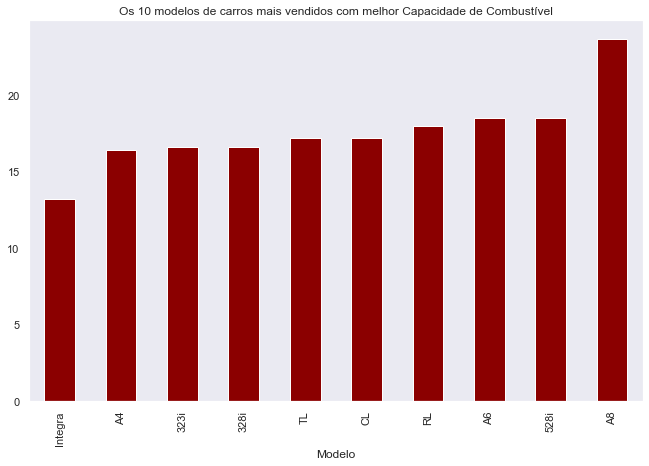

In [75]:
#Os 10 Modelos de carros mais vendidos com melhor Capacidade de Combustível
top_10_vendidos = cars[['Modelo', 'Capacidade de Combustível',]].head(10).set_index('Modelo').sort_values('Capacidade de Combustível', ascending=True)
top_10_vendidos.plot(kind='bar', figsize=(11,7), grid=False, color='darkred', legend=False)

plt.title('Os 10 modelos de carros mais vendidos com melhor Capacidade de Combustível')

plt.show()